# Ensemble Techniques

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio


Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (<b>12 marks</b>)

    a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
    
    b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
    
    c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
    
    
2. Multivariate analysis (<b>8 marks</b>)

    a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
    
    b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

## Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

## Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (<b>10 marks</b>)


2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (<b>15 marks</b>)


3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
the best algorithm and your reason behind it. (<b>5 marks</b>)

In [1]:
# import data manupulation and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#import machine learning models from sklearn libraries

In [2]:
# import data and view shape
bank = pd.read_csv('bank-full.csv')
bank.shape

(45211, 17)

In [3]:
# examine header of data set
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# examine data types of each column  
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#many datatypes are objects - need to convert to categorical or int
for i in bank.columns: 
    if bank[i].dtype == 'object': 
        bank[i] = pd.Categorical(bank[i])

#verify datatypes are converted from object
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [9]:
#check for null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
# examine quantitative properties of each column and look for outliers
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# look at value counts of categorical data
categories = ['job', 'marital', 'education', 'default','housing','loan','contact','poutcome', 'Target']
for i in categories:
    print(bank[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
no     39922
yes     5289
Name: Target, dtype: int64


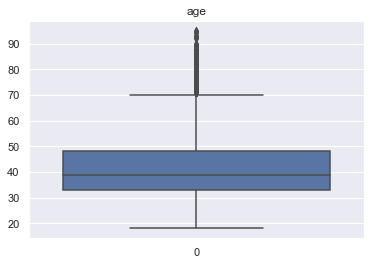

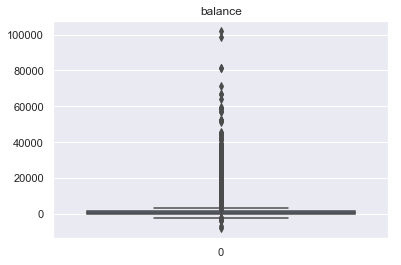

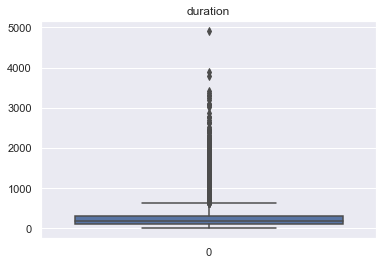

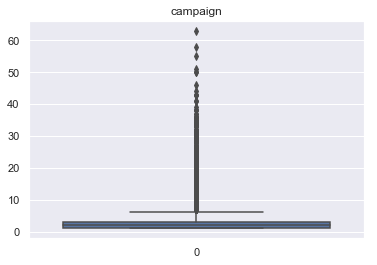

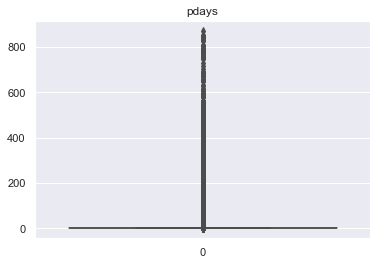

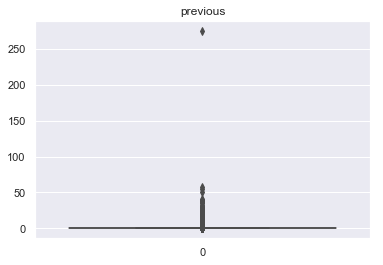

In [12]:
# look for outliers with box plot
numerical = ['age', 'balance', 'duration', 'campaign', 'pdays','previous']
for i in numerical:
    sns.boxplot(data = bank[i]).set_title(i)
    plt.show()

### Analysis

Age: fairly normal distribution, with a few outliers in their 80s and 90s, as would be expected given normal population distributions

Balance: 75% of clients have < 1,500 in their account. Many outliers will skew the data when looking at averages

Campaing, pdays, duration, and previous: most data around 0, but long tail of outliers



C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


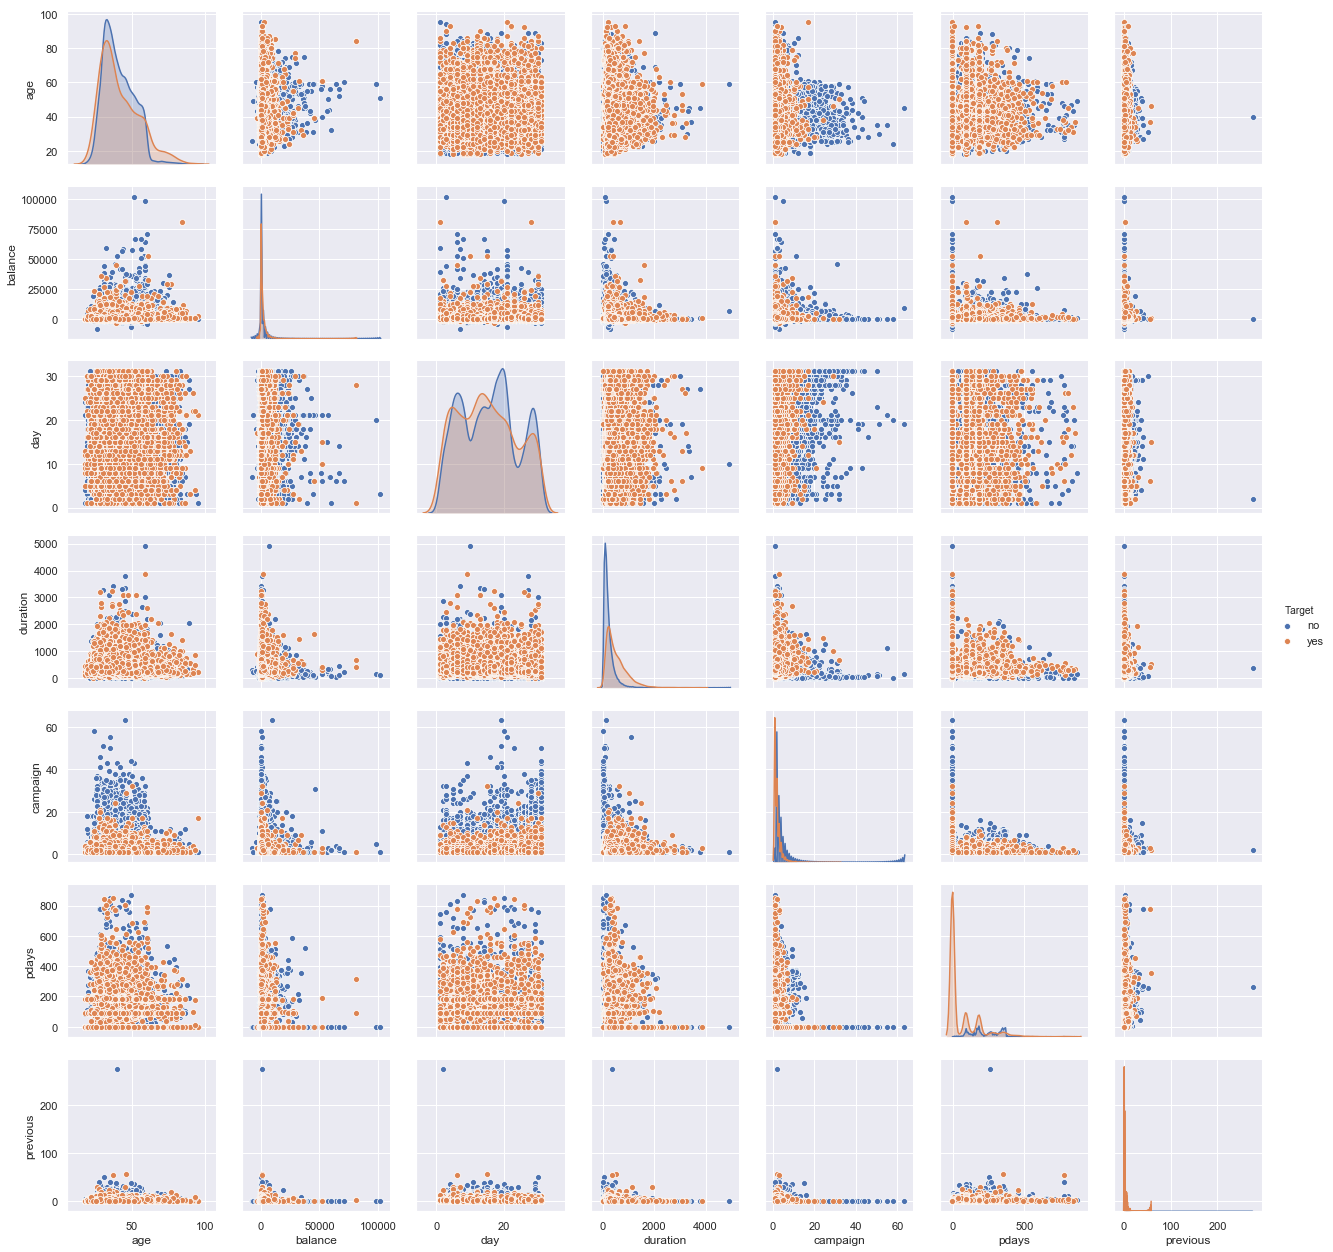

In [13]:
#use correlation matrix to check for highly correlated variables
sns.pairplot(bank, hue = 'Target')
plt.show()

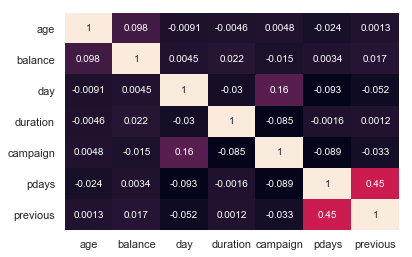

In [14]:
#use heatmap to view high correlation/redundant data
sns.heatmap(bank.corr(), annot = True, cbar = False)
plt.show()

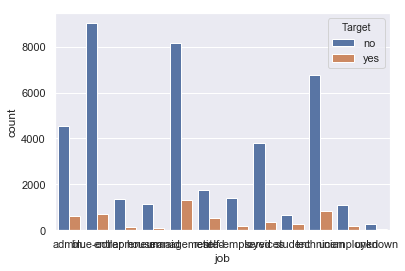

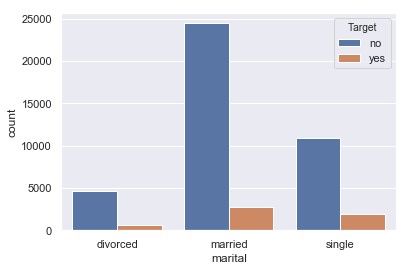

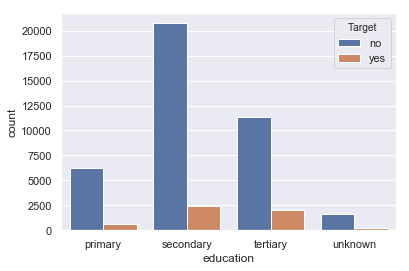

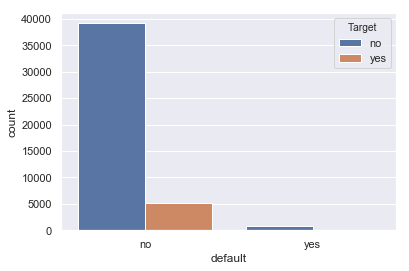

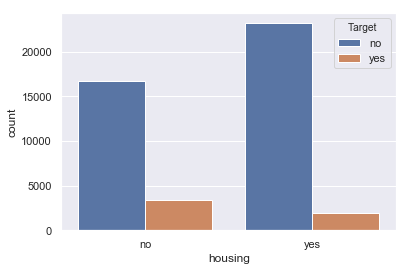

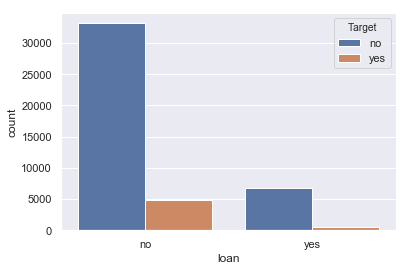

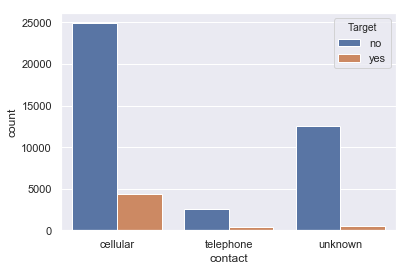

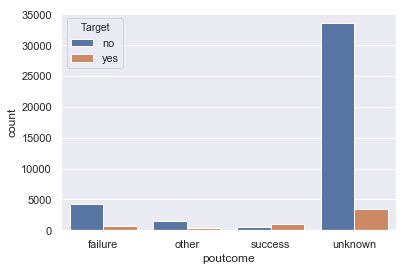

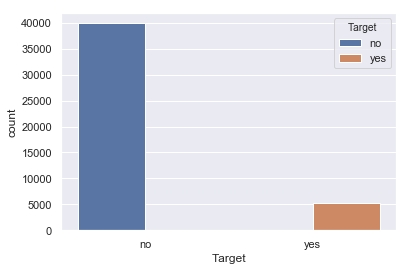

In [15]:
#look at categorical variables compared to 
for i in categories:
    sns.countplot(data = bank, x = i, hue = 'Target')
    plt.show()

### Analysis
For categorical variables

Job: 288 values are unknown out of 45k+. This is such a small number (0.6%), and employment seems like a critical input for getting a loan, recommend dropping these rows

Marital status: all values are accounted for

Education: high number of "unknown" values. Recommend replacing these values with the mode of the data (secondary)

Education and housing: no unknown values

Contact: large number of unknowns, recommend either dropping this category (telephone and cellular are essentially the same) or replacing unknowns with the mode (cellular)

Month and day: these variables seem redundant with the "pdays" prior days variable, and have questionable value when you don't know the year. While certain months, or days of the month could be better for getting customers on the phone, the "prior days" variable should compensate for that.

## Address missing data and data pollution

Implement changes to bank dataset mentioned above

In [16]:
bank.drop(columns = ['month', 'day'], inplace = True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


In [17]:
#remove rows where "jobs" is unknown
bank.drop(bank.loc[(bank['job'] == 'unknown')].index, inplace = True)

#check shape to make sure rows were dropped
bank.shape

(44923, 15)

In [18]:
#replace unknown education with the mode of the data - secondary
bank.loc[(bank['education']== 'unknown'), 'education'] = 'secondary'

In [19]:
#remove contact
bank.drop(columns = ['contact'], inplace = True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,139,1,-1,0,unknown,no


In [20]:
#check that unknowns were cleaned up
categories = ['job', 'marital', 'education', 'default','housing','loan','poutcome', 'Target']
for i in categories:
    print(bank[i].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown             0
Name: job, dtype: int64
married     27011
single      12722
divorced     5190
Name: marital, dtype: int64
secondary    24861
tertiary     13262
primary       6800
unknown          0
Name: education, dtype: int64
no     44110
yes      813
Name: default, dtype: int64
yes    25104
no     19819
Name: housing, dtype: int64
no     37683
yes     7240
Name: loan, dtype: int64
unknown    36704
failure     4881
other       1838
success     1500
Name: poutcome, dtype: int64
no     39668
yes     5255
Name: Target, dtype: int64


### Encode the data and create training set (70:30)

In [21]:
#encode the categorical variables
bank_enc = pd.get_dummies(bank, drop_first = True)
bank_enc.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143,261,1,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,33,2,76,1,-1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,0
3,47,1506,92,1,-1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,35,231,139,1,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [55]:
#check datatypes of encoded data
bank_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 27 columns):
age                    44923 non-null int64
balance                44923 non-null int64
duration               44923 non-null int64
campaign               44923 non-null int64
pdays                  44923 non-null int64
previous               44923 non-null int64
job_blue-collar        44923 non-null uint8
job_entrepreneur       44923 non-null uint8
job_housemaid          44923 non-null uint8
job_management         44923 non-null uint8
job_retired            44923 non-null uint8
job_self-employed      44923 non-null uint8
job_services           44923 non-null uint8
job_student            44923 non-null uint8
job_technician         44923 non-null uint8
job_unemployed         44923 non-null uint8
marital_married        44923 non-null uint8
marital_single         44923 non-null uint8
education_secondary    44923 non-null uint8
education_tertiary     44923 non-null uint8
default_yes

In [30]:
#check correlation matrix
bank_enc.corr()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
age,1.000000,0.097949,-0.004521,0.004330,-0.023302,0.001573,-0.042125,0.022638,0.087731,-0.021620,...,-0.427759,-0.068494,-0.080679,-0.017675,-0.182947,-0.013977,-0.022585,0.035716,-0.001396,0.025411
balance,0.097949,1.000000,0.021629,-0.015042,0.003684,0.016936,-0.048497,0.009833,0.001812,0.068511,...,-0.012488,-0.066179,0.084381,-0.066762,-0.068381,-0.084233,0.008639,0.035832,-0.030732,0.052814
duration,-0.004521,0.021629,1.000000,-0.084356,-0.002597,0.000749,0.009400,-0.001425,-0.008152,-0.008615,...,0.020178,0.001630,0.000871,-0.009964,0.004787,-0.012966,-0.001998,0.042193,-0.002579,0.394595
campaign,0.004330,-0.015042,-0.084356,1.000000,-0.088240,-0.032428,0.009632,0.002348,0.003302,0.017366,...,-0.022367,-0.019240,0.013291,0.017215,-0.022609,0.010553,-0.019857,-0.057231,0.107474,-0.072729
pdays,-0.023302,0.003684,-0.002597,-0.088240,1.000000,0.454357,0.019474,-0.014460,-0.031620,-0.008528,...,0.027872,0.019785,-0.008066,-0.030105,0.123421,-0.023462,0.390324,0.228156,-0.870191,0.102585
previous,0.001573,0.016936,0.000749,-0.032428,0.454357,1.000000,-0.017504,-0.008322,-0.015339,0.019236,...,0.017114,-0.008920,0.022711,-0.018381,0.036571,-0.011370,0.306808,0.200962,-0.532216,0.092645
job_blue-collar,-0.042125,-0.048497,0.009400,0.009632,0.019474,-0.017504,1.000000,-0.097301,-0.088601,-0.271572,...,-0.088998,0.047736,-0.322700,0.010083,0.175162,0.016981,0.000769,-0.053225,0.022857,-0.072368
job_entrepreneur,0.022638,0.009833,-0.001425,0.002348,-0.014460,-0.008322,-0.097301,1.000000,-0.031173,-0.095550,...,-0.050570,-0.051291,0.067382,0.026219,0.009530,0.039374,-0.013718,-0.019152,0.015144,-0.019724
job_housemaid,0.087731,0.001812,-0.008152,0.003302,-0.031620,-0.015339,-0.088601,-0.031173,1.000000,-0.087007,...,-0.062474,-0.067298,-0.057510,-0.000450,-0.080709,-0.017680,-0.016965,-0.009381,0.026310,-0.015242
job_management,-0.021620,0.068511,-0.008615,0.017366,-0.008528,0.019236,-0.271572,-0.095550,-0.087007,1.000000,...,0.032543,-0.425174,0.599570,-0.002936,-0.066787,-0.040287,0.001662,0.021637,-0.013217,0.033064


In [28]:
# for some reason, the encoded bank data still has a column for "unknown" job and education, even though that data was removed
# unable to troubleshoot root of issue within timeframe, will explictly drop those columns
bank_enc.drop(columns = ['job_unknown', 'education_unknown'], inplace = True)

In [171]:
#recheck correlation matrix to ensure rows are dropped, also highlight any correlations > 0.8
bank_enc.corr() > .8

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
balance,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
duration,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
campaign,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
pdays,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
previous,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
job_blue-collar,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
job_entrepreneur,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
job_housemaid,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
job_management,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [32]:
#split data into training and testing using train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bank_enc.drop('Target_yes', axis=1), bank_enc['Target_yes'], test_size = .3, random_state = 7)

In [33]:
#check shape of test and training data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31446, 26), (13477, 26), (31446,), (13477,))

### Logistic Regression and Decision Tree

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as met

In [146]:
lr = LogisticRegression(random_state = 7,solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
y_predict = lr.predict(X_test)

In [148]:
#calculate metrics for Log Regression
print('The accuracy is', met.accuracy_score(y_test, y_predict).round(2))
print('The precision is', met.precision_score(y_test, y_predict).round(2))
print('The recall is', met.recall_score(y_test, y_predict).round(2))
print('The f1 score is', met.f1_score(y_test, y_predict).round(2))

The accuracy is 0.9
The precision is 0.64
The recall is 0.31
The f1 score is 0.41


In [152]:
#create pandas dataframe with results
results = {'Log Regression': [met.accuracy_score(y_test, y_predict), met.precision_score(y_test, y_predict), met.recall_score(y_test, y_predict), met.f1_score(y_test, y_predict)]   }
result_mat = pd.DataFrame(data = results, index = ['Accuracy', 'Precision', 'Recall', 'f1'])
result_mat.head()

,Log Regression
Accuracy,0.900423
Precision,0.642375
Recall,0.306504
f1,0.414996


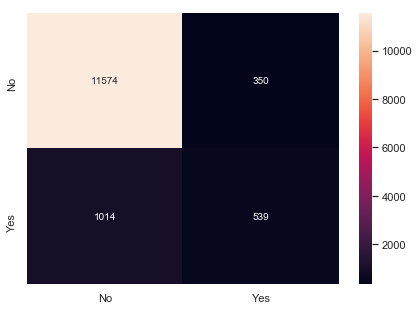

In [170]:
#confusion matrix for Log Regression

cm=met.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [153]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [154]:
tree.fit(X_train, y_train)
y_predicted = tree.predict(X_test)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.8618386881353417)

### Analysis and Pruning
The training data accuracy is 1.0 and the testing data is 0.86 - which means the data is likely overfit. Next steps are to prune the decision tree and optimize for testing data accuracy using min leaf sample and max depth inputs to Decision Tree model

In [155]:
#prune decision tree model and experiment with max-depth to improving test data accuracy
tree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 10, random_state = 7)
tree

tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)

#print accuracy scores for train and test data
print('The accuracy of the training data is', tree.score(X_train, y_train).round(4), 'and the accuracy of the testing data is', tree.score(X_test, y_test).round(2))

The accuracy of the training data is 0.9122 and the accuracy of the testing data is 0.9


In [157]:
#calculate metrics for Decision Tree Regression
print('The accuracy is', met.accuracy_score(y_test, y_predict).round(2))
print('The precision is', met.precision_score(y_test, y_predict).round(2))
print('The recall is', met.recall_score(y_test, y_predict).round(2))
print('The f1 score is', met.f1_score(y_test, y_predict).round(2))

The accuracy is 0.9
The precision is 0.61
The recall is 0.35
The f1 score is 0.44


In [159]:
#add metrics for decision tree to our results matrix
result_mat['Decision Tree'] = [met.accuracy_score(y_test, y_predict), met.precision_score(y_test, y_predict), met.recall_score(y_test, y_predict), met.f1_score(y_test, y_predict) ]
result_mat.head()

,Log Regression,Decision Tree
Accuracy,0.900423,0.898791
Precision,0.642375,0.606299
Recall,0.306504,0.347070
f1,0.414996,0.441441


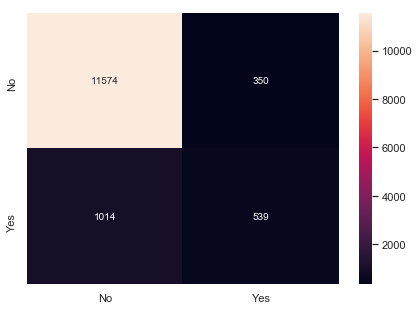

In [160]:
#confusion matrix for Decision Tree Regression

cm=met.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

### Ensemble Techniques Bagging and Boosting

The next section will examine the metrics for 3 different ensemble techniques - bagging, adaboosting, and gradient boosting

#### Bagging

In [187]:
from sklearn.ensemble import BaggingClassifier

#reduce complexity of initial decision tree by adjusting max depth
tree2 = DecisionTreeClassifier(max_depth = 3, random_state = 7)
tree2

bgcl = BaggingClassifier(base_estimator=tree2, n_estimators=25,random_state=7)
bgcl = bgcl.fit(X_train, y_train)

In [188]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.9016843511167174


In [189]:
print('The accuracy is', met.accuracy_score(y_test, y_predict).round(2))
print('The precision is', met.precision_score(y_test, y_predict).round(2))
print('The recall is', met.recall_score(y_test, y_predict).round(2))
print('The f1 score is', met.f1_score(y_test, y_predict).round(2))

The accuracy is 0.9
The precision is 0.63
The recall is 0.35
The f1 score is 0.45


In [190]:
result_mat['Bagging'] = [met.accuracy_score(y_test, y_predict), met.precision_score(y_test, y_predict), met.recall_score(y_test, y_predict), met.f1_score(y_test, y_predict) ]
result_mat.head()

,Log Regression,Decision Tree,Bagging
Accuracy,0.900423,0.898791,0.901684
Precision,0.642375,0.606299,0.634752
Recall,0.306504,0.347070,0.345782
f1,0.414996,0.441441,0.447687


#### Boosting